103.4301408
103
97.10558814235397
96


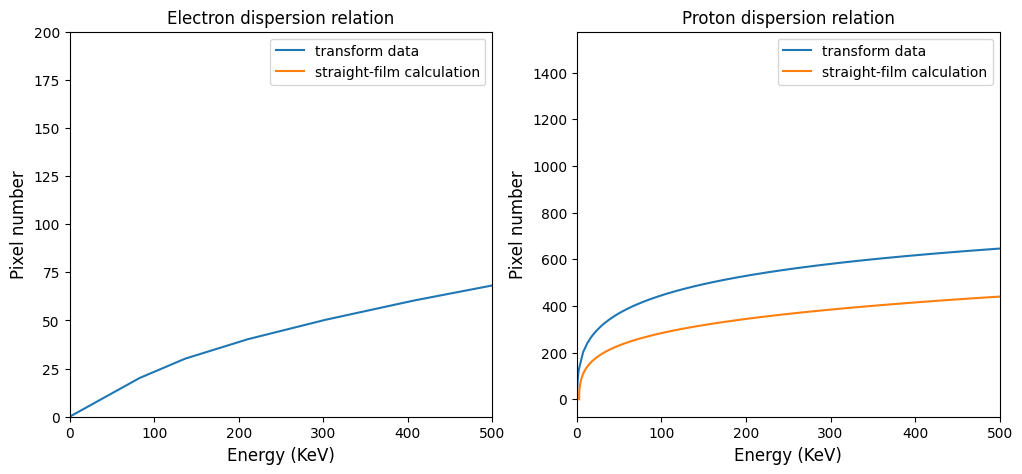

In [115]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d

def lineout(array, w1, w2):
    width = np.shape(array)[0]
    length = np.shape(array)[1]
    line_data = array[w2,:]
    for i in range(length):
        line_data[i] = (1/(w2+1-w1))*np.sum(array[w1:w2+1,i])
    return line_data

def theoretical_dispersion(x,A,d):
    energy = A*(x**2+d**2)**2
    return energy

def theoretical_dispersion_relativistic_e(x,a,D):
    m = 9.1*10**-31
    c = 3*10**8
    E = m*c**2
    eV = 1.6*10**-19
    energy = (1/1000)*(1/eV)*0.5*(-E+np.sqrt(E**2+((eV*0.87*c)**2)*(1/D)*((((x-a)**2)+D)**2)))
    return energy

def theoretical_dispersion_relativistic_p(x,a,D):
    m = 1.67*10**-27
    c = 3*10**8
    E = m*c**2
    eV = 1.6*10**-19
    energy = (1/1000)*(1/eV)*0.5*(-E+np.sqrt(E**2+((eV*0.87*c)**2)*(1/D)*((((x-a)**2)+D)**2)))
    return energy

energy_data_protons = np.loadtxt('NEPPS_Dispersion_Protons_087T.txt', skiprows=1)
data_protons = np.loadtxt('Generated_Dispersion.txt', delimiter=',')
energy_data_electrons = np.loadtxt('NEPPS_Dispersion_Electrons_087T.txt', skiprows=1)

def linear_fit(x,m,c):
    y = m*x+c
    return y

def transform_electron_axis(x, R):
    energy = np.zeros(len(x))
    start = energy_data_electrons[-1,1]
    print(start)
    for i in range(len(x)):
        if np.abs((1/R)*x[i]-start) == np.min(np.abs((1/R)*x-start)):
            index = i
    print(index)
    energy[0:index] = np.interp((1/R)*x[0:index],np.array(energy_data_electrons[:,1]),np.array(energy_data_electrons[:,0]))

    deltax = energy_data_electrons[-1,1]-energy_data_electrons[-2,1]

    deltaE = energy_data_electrons[-1,0]-energy_data_electrons[-2,0]

    grad = deltaE/deltax

    intercept = energy_data_electrons[-1,0] - grad*energy_data_electrons[-1,1]

    energy[index:] = linear_fit((1/R)*x[index:], grad, intercept)

    return energy

def transform_proton_axis(x, R):
    energy = np.zeros(len(x))
    start = data_protons[1,-1]
    print(start)
    for i in range(len(x)):
        if np.abs((1/R)*x[i]-start) == np.min(np.abs((1/R)*x-start)):
            index = i
    print(index)
    energy[0:index] = np.interp((1/R)*x[0:index],np.array(data_protons[1]),np.array(data_protons[0]))

    deltax = data_protons[1,-1]-data_protons[1,-2]

    deltaE = data_protons[0,-1]-data_protons[0,-2]

    grad = deltaE/deltax

    intercept = data_protons[0,-1] - grad*data_protons[1,-1]

    energy[index:] = linear_fit((1/R)*x[index:], grad, intercept)

    return energy

def find_index(axis,start,end):
    for i in range(len(axis)):
        if np.abs(axis[i]-start) == np.min(np.abs(axis-start)):
            start_i = i

    for i in range(len(axis)):
        if np.abs(axis[i]-end) == np.min(np.abs(axis-end)):
            end_i = i
    return start_i, end_i


r = 10

x_axis = np.linspace(0,1500,150)


fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].plot(transform_electron_axis(x_axis,10),x_axis,label='transform data')
axs[0].plot(theoretical_dispersion_relativistic_e((1/10000)*x_axis,0.0,0.008**2),x_axis,label='straight-film calculation')
axs[0].set_xlabel("Energy (KeV)")
axs[0].set_xlim(0,500)
axs[0].set_ylim(0,200)
axs[0].set_ylabel("Pixel number")
axs[0].set_title("Electron dispersion relation")
axs[0].legend()

axs[1].plot(transform_proton_axis(x_axis,10),x_axis,label='transform data')
axs[1].plot(theoretical_dispersion_relativistic_p((1/10000)*x_axis,0.001,0.012**2),x_axis,label='straight-film calculation')
axs[1].set_xlabel("Energy (KeV)")
axs[1].set_ylabel("Pixel number")
axs[1].set_xlim(0,500)
#axs[1].set_ylim(0,600)
axs[1].set_title("Proton dispersion relation")
axs[1].legend()

ther_, pcov_ = curve_fit(theoretical_dispersion, energy_data_electrons[:,1], energy_data_electrons[:,0], p0=[0.0028,5])

energy = theoretical_dispersion((1/10)*x_axis, ther_[0], ther_[1])

#axs[0].plot(energy,x_axis)

97.10558814235397
96
97.10558814235397
96
97.10558814235397
96
97.10558814235397
96


C:\Users\rayne\AppData\Local\Temp\ipykernel_33904\1187123461.py:30: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(np.array([0, 125, 250, 375, 500, 717, 789]), np.array([0, 0, 0, 0, 0, 0.0204, 0.0784]), 8)


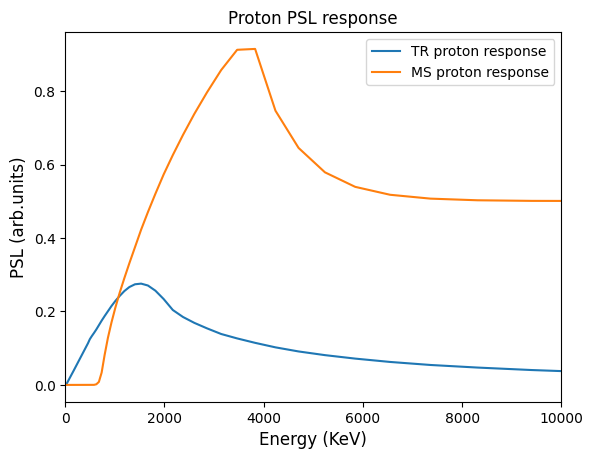

In [67]:
Proton_PSL_data = np.loadtxt('Proton_PSL_linylinx.txt', delimiter=',', skiprows=1)
Proton_PSL_data_low = np.loadtxt('Proton_PSL_low.txt', delimiter=',', skiprows=1)

TR_proton_energy_axis = 1000*Proton_PSL_data[:,0]
TR_proton_PSL_axis = Proton_PSL_data[:,1]

Proton_PSL_data = np.loadtxt('MS_Proton.txt', delimiter=',', skiprows=2)

MS_proton_energy_axis = 1000*Proton_PSL_data[:,0]
MS_proton_PSL_axis = Proton_PSL_data[:,1]

#plt.plot(TR_proton_energy_axis,TR_proton_PSL_axis)

#plt.plot(MS_proton_energy_axis,MS_proton_PSL_axis)

#plt.scatter(TR_proton_energy_axis,TR_proton_PSL_axis)

def find_exp_shift(E, A, a, shift):
    func = (A*np.exp(-a*E))+shift
    return func

def find_poly(E, A, a, shift):
    func = (A*E)**a+shift
    return func

def TR_proton_PSL_scale(Espace):
    PSL = np.interp(Espace,TR_proton_energy_axis,TR_proton_PSL_axis)
    return PSL

coefficients = np.polyfit(np.array([0, 125, 250, 375, 500, 717, 789]), np.array([0, 0, 0, 0, 0, 0.0204, 0.0784]), 8)

x = np.linspace(0,800,50)

poly_fit_MS = np.poly1d(coefficients)

#plt.plot(x,poly_fit_MS(x))

t_2, p_2 = curve_fit(find_exp_shift, np.linspace(4000,5000,100), np.interp(np.linspace(4000,5000,100),MS_proton_energy_axis,MS_proton_PSL_axis), p0=(1,0.0001,0.4))

fit_2 = find_exp_shift(np.linspace(4000,10000,100), t_2[0], t_2[1], t_2[2])

def MS_proton_PSL_scale(Espace):

    t_2, p_2 = curve_fit(find_exp_shift, np.linspace(4000,5000,100), np.interp(np.linspace(4000,5000,100),MS_proton_energy_axis,MS_proton_PSL_axis), p0=(1,0.0001,0.4))

    fit_2 = find_exp_shift(np.linspace(4000,10000,100), t_2[0], t_2[1], t_2[2])

    PSL = np.zeros(len(Espace))
    start = MS_proton_energy_axis[0]
    end = MS_proton_energy_axis[-1]
    
    for i in range(len(Espace)):
        if np.abs(Espace[i]-start) == np.min(np.abs(Espace-start)):
            start_index = i

    for i in range(len(Espace)):
        if np.abs(Espace[i]-end) == np.min(np.abs(Espace-end)):
            end_index = i

    PSL[start_index:end_index] = np.interp(Espace[start_index:end_index],MS_proton_energy_axis,MS_proton_PSL_axis)
    #PSL[:start_index] = MS_proton_PSL_axis[0]
    PSL[:start_index] = poly_fit_MS(Espace[:start_index])
    PSL[end_index:] = np.interp(Espace[end_index:],np.linspace(4000,10000,100),fit_2)

    return PSL

def find_exp(E, A, a):
    func = (A*np.exp(-a*E))
    return func

def find_2exp(E, A, a, B, b):
    func = func = ((A*np.exp(-a*E))+(B*np.exp(-b*E)))
    return func

def find_exp_proton(E, A, a, shift):
    func = (A*np.exp(-a*E))*TR_proton_PSL_scale(E)+shift
    return func

def find_2exp_proton(E, A, a, B, b, shift):
    func = ((A*np.exp(-a*E))+(B*np.exp(-b*E)))*TR_proton_PSL_scale(E)+shift
    return func

def find_temp(E, A, E0, kT):
    func = A*(1/np.sqrt(E))*np.exp((1/kT)*(np.sqrt(E)-np.sqrt(E0))**2)
    return func

##############################################################

energy_data_protons = np.loadtxt('NEPPS_Dispersion_Protons_087T.txt', skiprows=1)
energy_data_electrons = np.loadtxt('NEPPS_Dispersion_Electrons_087T.txt', skiprows=1)

def dxdE_electrons(x_in):
    x_d = np.array(energy_data_electrons[:,1])
    E_d = np.array(energy_data_electrons[:,0])
    dxde_data = np.gradient(x_d,E_d)
    dxde = np.interp(0.1*x_in,x_d,dxde_data)
    return dxde

def dxdE_protons(x_in):
    x_data = np.array(data_protons[1])
    E_data = np.array(data_protons[0])
    dxde_data = np.gradient(x_data,E_data)
    dxde = np.interp(0.1*x_in,x_data,dxde_data)
    return dxde

plt.plot(transform_proton_axis(x_axis,10), TR_proton_PSL_scale(transform_proton_axis(x_axis,10)), label = 'TR proton response')

plt.plot(transform_proton_axis(x_axis,10), MS_proton_PSL_scale(transform_proton_axis(x_axis,10)), label = 'MS proton response')

#plt.plot(np.linspace(4000,10000,100),find_exp_shift(np.linspace(4000,10000,100), t[0], t[1], t[2]))


#plt.plot(x, fit1)

plt.xlim(0,10000)
plt.xlabel("Energy (KeV)")
plt.ylabel("PSL (arb.units)")
plt.title("Proton PSL response")
plt.legend()

Text(0.5, 1.0, 'MS Electron PSL response')

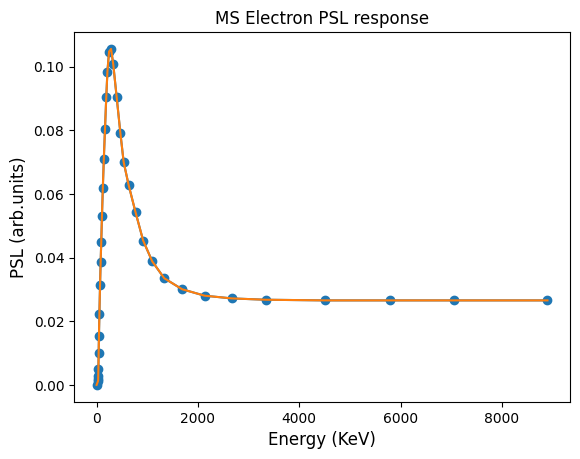

In [68]:
import numpy as np

MS_signal_data = np.loadtxt('MS_signal.txt', skiprows=1) # Adjust delimiter if needed
MS_energy_axis = 1000*MS_signal_data[:,0]
MS_PSL_axis = MS_signal_data[:,1]

plt.plot(MS_energy_axis,MS_PSL_axis)

def MS_PSL_scale(Espace):
    PSL = np.interp(Espace,MS_energy_axis,MS_PSL_axis)
    return PSL

def find_exp_electron(E, A, a, shift):
    func = (A*np.exp(-a*E))*MS_PSL_scale(E)+shift
    return func

def find_2exp_electron(E, A, a, B, b, shift):
    func = ((A*np.exp(-a*E))+(B*np.exp(-b*E)))*MS_PSL_scale(E)+shift
    return func

# Assuming your text file is named 'data.txt' and contains a 2D array
energy_data = np.loadtxt('Electron_Dispersion_Z_vs_Ebeam_0028T.txt', skiprows=8) # Adjust delimiter if needed

MS_signal_data = np.loadtxt('MS_signal.txt', skiprows=1) # Adjust delimiter if needed
MS_energy_axis = 1000*MS_signal_data[:,0]
MS_PSL_axis = MS_signal_data[:,1]

plt.plot(MS_energy_axis,MS_PSL_axis)
plt.scatter(MS_energy_axis,MS_PSL_axis)
plt.xlabel("Energy (KeV)")
plt.ylabel("PSL (arb.units)")
plt.title("MS Electron PSL response")
#plt.plot(transform_electron_axis(x_axis,10),MS_PSL_scale(transform_electron_axis(x_axis,10)))
#print(np.shape(energy_data[:,0]))
#print(np.shape(MS_energy_axis))
#plt.xlim([0,100000])
#print(np.shape(data))

In [69]:
def gaussian(x, mu, sigma):
  """
  Calculates the Gaussian function.

  Args:
    x: The input value or array.
    mu: The mean of the Gaussian distribution.
    sigma: The standard deviation of the Gaussian distribution.

  Returns:
    The Gaussian function value(s) at the given input(s).
  """
  term1 = 1 / (sigma * np.sqrt(2 * np.pi))
  term2 = np.exp(-0.5 * ((x - mu) / sigma) ** 2)
  return term1 * term2

Temperature in keV =  400
Bulk speed in c =  0
1.7073957598879784e-25


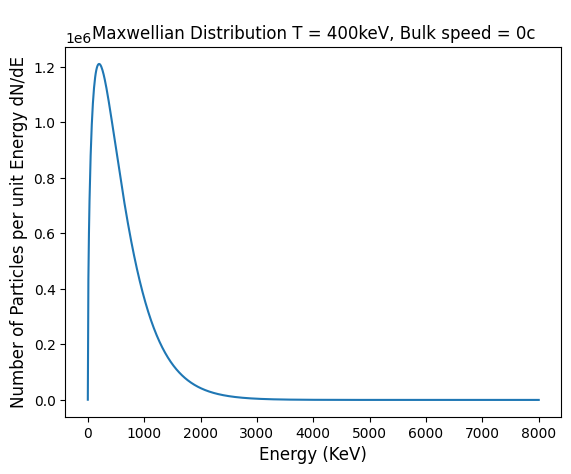

In [70]:
def p_(E, m = 9.11e-31):
    c = 3e8
    E_j = E*(1000*(1.6e-19))
    p = (1/c)*np.sqrt((E_j**2)-((m**2)*(c**4)))
    return p

def gamma(beta):
    gma = 1/(np.sqrt(1-(beta**2)))
    return gma

def Ep_prime(E,beta, particle = 'electron'):
    c = 3e8
    E_j = E*1000*(1.6e-19)
    if particle == 'electron':
        m = 9.11e-31
    elif particle == 'proton':
        m = 1.673e-27
    p = p_(E, m)
    gma = gamma(beta)
    E_prime = gma*(E_j-(beta*c*p))
    p_prime = gma*(p-((beta*E_j)/c))
    return E_prime, p_prime

ratio = 1836.4431104

def rel_maxwell(E, kT, beta, A, particle = 'electron'):
    c = 3e8
    gma = gamma(beta)
    E_j = E*(1000*(1.6e-19))
    if particle == 'electron':
        mass_energy = 512.4376*(1000*(1.6e-19))
    elif particle == 'proton':
        mass_energy = ratio*512.4376*(1000*(1.6e-19))
    else:
        mass_energy = ratio*512.4376*(1000*(1.6e-19))
    if particle == 'electron':
        E_prime, p_prime = Ep_prime(E,beta)
        p = p_(E)
    elif particle == 'proton':
        E_prime, p_prime = Ep_prime(E,beta,particle = 'proton')
        p = p_(E, m = 1.673e-27)
    else:
        E_prime, p_prime = Ep_prime(E,beta,particle = 'proton')
        p = p_(E, m = 1.673e-27)
    #dist = np.exp(-(E_prime/(kT*1000*1.6e-19)))*gma*(1-((beta*p*c)/E_j))*(E_j/(p*c**2))
    ekt = ((E_prime-mass_energy)/(kT*1000*1.6e-19))
    dist = np.exp(-ekt)*gma*(E_j*p/c-((beta*p**2)))
    area = np.trapz(dist,E)
    dist_renormal = A*dist/area
    return dist_renormal

E = np.linspace(0,8000,800)

#Temp = 900
#Bulk_Speed = 0.05
#Amplitude = 4.5e6

#Temp = 300
#Bulk_Speed = 0.7
#Amplitude = 4.5e6

T = 400
Bulk_Speed = 0
Amplitude = 1.0e9

#Temp = 50
#Bulk_Speed = 0.3
#T = ((gamma(Bulk_Speed)*9*9.11e-15)/(1.6e-16))-511
#print(T)
#Amplitude = 1.5e5

#dist = rel_maxwell(E+512.4376,T,Bulk_Speed,Amplitude)
dist = rel_maxwell((E+(ratio*512.4376)),T,Bulk_Speed,Amplitude, particle = 'proton')

plt.plot(E,dist)
#plt.ylim(-100,3000)
#plt.xlim(-100,5000)
plt.xlabel("Energy (KeV)")
plt.ylabel("Number of Particles per unit Energy dN/dE")
plt.title('Maxwellian Distribution T = '+str(T)+'keV, Bulk speed = '+str(Bulk_Speed)+'c')

print('Temperature in keV = ', T)
print('Bulk speed in c = ', Bulk_Speed)
print(p_(512.4376))

103.4301408
1034
[0.00000000e+00 1.00066711e+00 2.00133422e+00 ... 1.49799867e+03
 1.49899933e+03 1.50000000e+03]


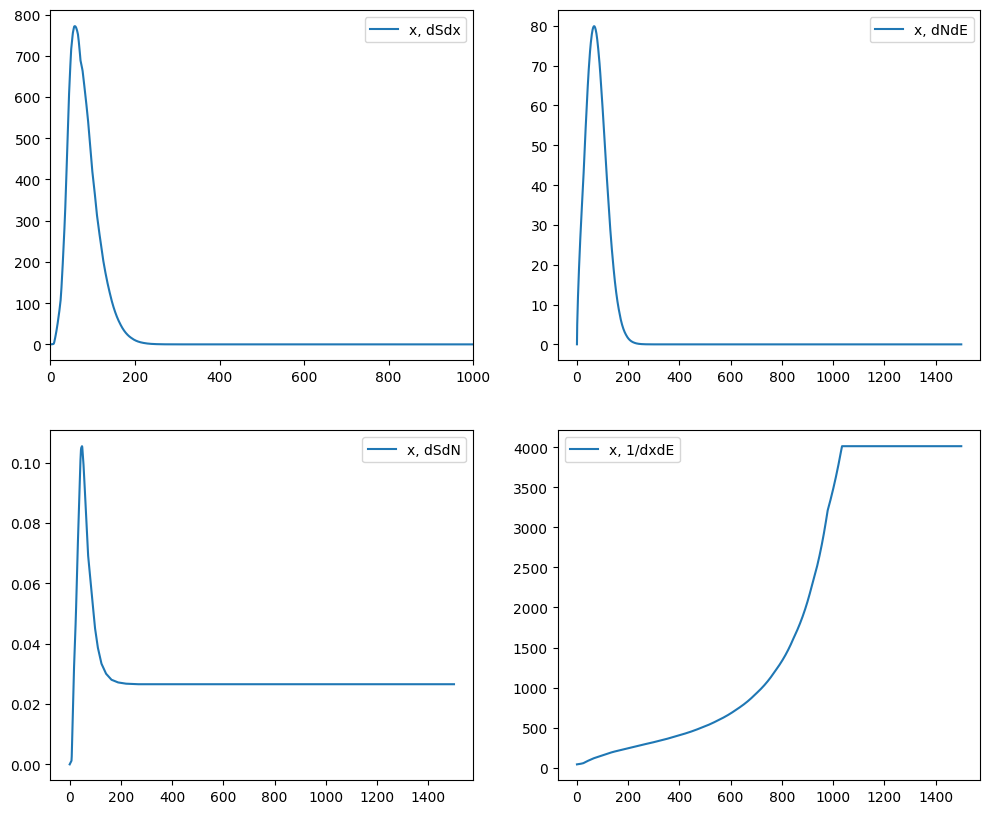

In [141]:
from scipy.ndimage import gaussian_filter
import numpy as np

x_theoretical = np.linspace(0,1500,1500)
E_theoretical = transform_electron_axis(x_theoretical,10)

T = 165.6
Bulk_Speed = 0.652
Amplitude = 1.0e5

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

dNdE = rel_maxwell(E_theoretical+512.4376,T,Bulk_Speed,Amplitude)
dSdN = MS_PSL_scale(E_theoretical)
axs[1,0].plot(x_theoretical,dSdN, label = "x, dSdN")
#axs[1,0].plot(E_theoretical,dSdN)

dSdE = dNdE*dSdN
dSdx = dSdE/dxdE_electrons(x_theoretical)

axs[0,0].plot(x_theoretical,dSdx, label = "x, dSdx")

axs[0,1].plot(x_theoretical,dNdE, label = "x, dNdE")
#axs[0,1].plot(E_theoretical,dNdE)

axs[1,1].plot(x_theoretical,1/(dxdE_electrons(x_theoretical)), label = "x, 1/dxdE")
#axs[1,1].set_ylim(0,10)
axs[0,0].set_xlim(0,1000)
# Example usage with a 2D array
#filtered_image = gaussian_filter(image, sigma=1)
#print(filtered_image)
axs[0,0].legend()
axs[0,1].legend()
axs[1,0].legend()
axs[1,1].legend()

print(x_theoretical)

103.4301408
1034


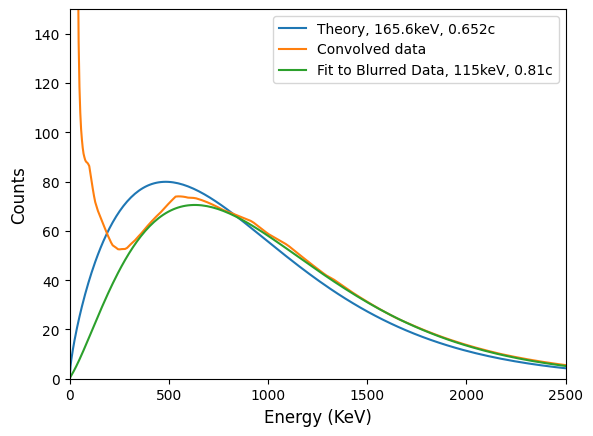

In [147]:
#fig, axs = plt.subplots(1, 2, figsize=(12, 5))

x_theoretical = np.linspace(0,1500,1500)
E_theoretical = transform_electron_axis(x_theoretical,10)

dSdN = MS_PSL_scale(E_theoretical)

chi = 10

slit_function = gaussian(np.linspace(-2*chi,2*chi,4*chi),0,chi)

length = 60
slit_function = (1/length)*(np.ones(length)+np.linspace(-0.01,0.01,length))

dSdx_ = np.convolve(dSdx,slit_function,mode = 'same')

dSdE_ = dSdx_*dxdE_electrons(x_theoretical)

dNdE_ = dSdE_/dSdN

T = 115
Bulk_Speed = 0.81
Amplitude = 9.3e4

dNdE_fit = rel_maxwell(E_theoretical+512.4376,T,Bulk_Speed,Amplitude)
plt.plot(E_theoretical, dNdE, label='Theory, 165.6keV, 0.652c')
plt.plot(E_theoretical, dNdE_, label='Convolved data')
plt.plot(E_theoretical, dNdE_fit, label='Fit to Blurred Data, 115keV, 0.81c')
plt.xlim(0,2500)
plt.ylim(0,150)
plt.xlabel("Energy (KeV)")
plt.ylabel("Counts")
plt.rc('axes', labelsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('legend', fontsize=10)
#plt.title("NEPPS Electron Energy Distribution")
plt.legend()

97.10558814235397
970


C:\Users\rayne\AppData\Local\Temp\ipykernel_33904\924950530.py:36: RuntimeWarning: divide by zero encountered in divide
  dNdE_ = dSdE_/dSdN
C:\Users\rayne\AppData\Local\Temp\ipykernel_33904\924950530.py:36: RuntimeWarning: invalid value encountered in divide
  dNdE_ = dSdE_/dSdN
C:\Users\rayne\AppData\Local\Temp\ipykernel_33904\924950530.py:51: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,35)
C:\Users\rayne\AppData\Local\Temp\ipykernel_33904\924950530.py:53: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0,500)


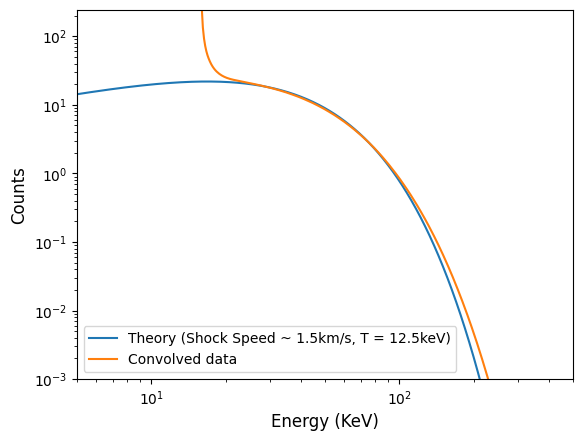

In [128]:
#fig, axs = plt.subplots(1, 2, figsize=(12, 5))

x_theoretical = np.linspace(0,1500,1500)
E_theoretical = transform_proton_axis(x_theoretical,10)

T = 12.5 #temperature from compression, 1.6km/s -> 0.4km/s
Bulk_Speed = 0.005*0.75 #0.005c is 1.5km/s, downstream travels ~1.125km/s
Amplitude = 1e3

#fig, axs = plt.subplots(2, 2, figsize=(12, 10))

dNdE = rel_maxwell(E_theoretical+(ratio*512.4376),T,Bulk_Speed,Amplitude, particle = 'proton')
#dNdE = rel_maxwell(E_theoretical+(ratio*512.4376),5,0.015,Amplitude, particle = 'proton')
dSdN = TR_proton_PSL_scale(E_theoretical)
#axs[1,0].plot(x_theoretical,dSdN, label = "x, dSdN")
#axs[1,0].plot(E_theoretical,dSdN)

dSdE = dNdE*dSdN
dSdx = dSdE/dxdE_protons(x_theoretical)

dSdN = TR_proton_PSL_scale(E_theoretical)

chi = 20

slit_function = gaussian(np.linspace(-2*chi,2*chi,4*chi),0,chi)

length = 60
slit_function = (1/length)*(np.ones(length+1)+np.linspace(-0.1,0.1,length+1))

#slit_function = np.ones(2)

dSdx_ = np.convolve(dSdx,slit_function,mode = 'same')

dSdE_ = dSdx_*dxdE_protons(x_theoretical)

dNdE_ = dSdE_/dSdN


plt.loglog(E_theoretical, dNdE, label='Theory (Shock Speed ~ 1.5km/s, T = 12.5keV)')
plt.loglog(E_theoretical, dNdE_, label='Convolved data')

T = 11
Bulk_Speed = 0.0045*0.75
Amplitude = 1e3

#dNdE_fit = rel_maxwell(E_theoretical+(ratio*512.4376),T,Bulk_Speed,Amplitude, particle='protons')
#plt.plot(E_theoretical, dNdE_fit, label='Fit to Blurred Data, 115keV, 0.76c')
#low energy
plt.xlim(5,800)
#plt.xlim(5,150)
plt.ylim(0,35)

plt.xlim(0,500)
plt.ylim(1e-3,35*7)

#high energy
#plt.xlim(2000,8000)
#plt.ylim(0,0.2)
#plt.xlim(5,1000)
#plt.ylim(1e-3,100)

plt.xlabel("Energy (KeV)")
plt.ylabel("Counts")
plt.rc('axes', labelsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('legend', fontsize=10)
#plt.title("NEPPS Electron Energy Distribution")
plt.legend()